In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kurtosis # to install scipy, search 'scipy anaconda'
from sklearn.decomposition import FastICA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
%matplotlib inline



In [149]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
features = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
labels = pd.DataFrame(cancer['target'], columns=['diagnosis'])

data = pd.concat([labels, features], axis=1)
data.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# 2. Use the Superstore data. Create a dataframe with columns State, Sales, Profit, and Discount for California. 
# Create a second dataframe with the same columns for Michigan. 
# Sort both dataframes by sales in descending order. Concatenate the 2 dataframes vertically (California above Michigan).
# Reset the index afterwards (using reset_index(drop = True) function). 
# What's the value at index [1000, 2]?

In [10]:
store = pd.read_csv('Superstore.csv')
store.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

In [29]:
df1 = store[['State', 'Sales', 'Profit', 'Discount']]
df1_cali = df1[df1['State'] == 'California']
df1_cali = df1_cali.sort_values(by = 'Sales', ascending = False)
df1_cali

,State,Sales,Profit,Discount
7455,California,100119,7498,0.03
1772,California,43046,4073,0.07
244,California,27588,2009,0.05
751,California,25712,2755,0.06
7616,California,18125,3858,0.05
...,...,...,...,...
1992,California,4,-4,0.03
5975,California,4,2,0.00
8676,California,3,-8,0.04
8475,California,2,-5,0.02


In [30]:
df1_mich = df1[df1['State'] == 'Michigan']
df1_mich = df1_mich.sort_values(by = 'Sales', ascending = False)
df1_mich

,State,Sales,Profit,Discount
3184,Michigan,32510,349,0.06
2753,Michigan,12600,1015,0.00
3332,Michigan,12586,1417,0.06
7433,Michigan,10589,1521,0.03
155,Michigan,9540,-164,0.02
...,...,...,...,...
8649,Michigan,8,-12,0.04
6662,Michigan,5,-3,0.01
7415,Michigan,4,-15,0.05
8427,Michigan,3,1,0.01


In [41]:
# Merging both df1_cali and df1_mich
df1_combined = pd.concat([df1_cali, df1_mich], axis = 0)
df1_combined = df1_combined.reset_index(drop=True)
df1_combined.iloc[1000,2]

-238

In [42]:
# 3. Use the Superstore data (you may need to re-read it into Pandas so it has 26 columns to begin with). 
# Create a dataframe that sorts average sales by category. 
# Rename this column as 'Avg_Cat_Sales' using the rename function
# (look up the documentation https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html).
# Merge this dataframe with the original dataframe using category as the key, so a new column Avg_Cat_Sales showing average sales for the category in each row is added.
# (i.e. the original dataframe is not changed, but simply has an extra column added on the right).
# What's the value at index [1000, 26]? Round to nearest 1 decimal. 

In [51]:
df3 = store.groupby('Category')['Sales'].mean().reset_index()
df3 = df3.rename(columns={'Sales': 'Avg_Cat_Sales'})
merged_data = store.merge(df3, on='Category', how='left')
merged_data.iloc[1000,26]

183.91588107324148

In [52]:
# Use the Superstore data (you may need to re-read it into Pandas so it has columns to begin with)
# create a dataframe that shows tha max values (sales) of a transaction in each state
# Rename this column Max_state_sales.
# merge this dataframe with the original dataframe using state as the key, so a new column Max_state_sales
# showing max sales for the state in each row is added.
# (i.e., the original dataframe is not changed, but simply has an extra columns added on the right)
# what's the value at index [500,26]?


max_state_sales= store.groupby("State")["Sales"].max().reset_index()


max_state_sales.rename(columns={"Sales": "Max_state_sales"}, inplace=True)


merged_df = store.merge(max_state_sales, on="State", how="left")


value_at_index_500_26 = merged_df.at[500, "Max_state_sales"]
value_at_index_500_26

19568

In [55]:
# 5. Create a dataframe that counts the number of records for the paper category by customer id. 
# Create another dataframe that counts the number of records for the tables category by customer id. 
# Merge the 2 dataframes by customer id so only customer ids with purchases in both categories are kept. 
# How many customers made purchases in both categories?

In [68]:

# Create a DataFrame counting the number of records for the 'Paper' category by customer ID
paper_count = store[store['Category'] == 'Paper'].groupby('Customer ID').size().reset_index(name='Paper Count')
paper_count

,Customer ID,Paper Count
0,3,2
1,5,1
2,6,1
3,7,1
4,14,1
...,...,...
1023,3394,2
1024,3396,2
1025,3397,1
1026,3399,1


In [70]:
# Create a DataFrame counting the number of records for the 'Tables' category by customer ID
tables_count = store[store['Category'] == 'Tables'].groupby('Customer ID').size().reset_index(name='Tables Count')
tables_count

,Customer ID,Tables Count
0,9,1
1,20,1
2,21,1
3,23,1
4,55,2
...,...,...
368,3359,1
369,3367,1
370,3374,1
371,3375,1


In [71]:
# Merge the two DataFrames by customer ID
merged_counts = pd.merge(paper_count, tables_count, on='Customer ID', how='inner')

merged_counts

,Customer ID,Paper Count,Tables Count
0,20,1,1
1,21,1,1
2,23,2,1
3,83,1,1
4,93,1,1
...,...,...,...
179,3289,2,2
180,3299,1,1
181,3367,1,1
182,3374,2,1


In [74]:
# 6. Add a third column to the dataframe in Q5 that shows number of records made for the telephones and communication category by customer id. 
# The dataframe should only show customer ids with purchases in all 3 categories. 
# How many customers made purchases in all 3 categories?

In [79]:
telcom_count = store[store['Category'] == 'Telephones and Communication'].groupby('Customer ID').size().reset_index(name='Telcom Count')
merged_counts = pd.merge(merged_counts, telcom_count, on='Customer ID', how='inner')
merged_counts

,Customer ID,Paper Count,Tables Count,Telcom Count
0,93,1,1,1
1,117,1,1,1
2,194,2,1,1
3,198,4,1,1
4,211,1,1,3
...,...,...,...,...
69,3011,3,1,1
70,3083,2,2,1
71,3151,2,3,1
72,3188,1,1,2


In [80]:
# 7. Create a dataframe that shows the number of records for each category in 2016 and 2017 using order date. 
# i.e. Each row should show the number of records for a category in 2016 and 2017. 
# There should be 3 columns: Category, 2016_Records, and 2017_Records. Sort the dataframe by category. 
# What’s the value at index [10, 2]?

In [89]:
store.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

In [105]:
store['Order Date'] = pd.to_datetime(store['Order Date'])

store['Year'] = store['Order Date'].dt.year

df_year = store[(store['Year'] == 2016) | (store['Year'] == 2017)]

df_category = df_year.groupby(['Category', 'Year']).size().reset_index(name='Records')

df_category_pivot = df_category.pivot(index='Category', columns='Year', values='Records').reset_index()
df_category_pivot.columns.name = None  # Remove the column name
df_category_pivot
# df_category_pivot.rename(columns={2016: '2016_Records', 2017: '2017_Records'}, inplace=True)

# Sort the DataFrame by category
# df_category_pivot = df_category_pivot.sort_values(by='Category')

# df_category_pivot.iloc[10,2]

,Category,2016,2017
0,Appliances,186,191
1,Binders and Binder Accessories,396,424
2,Bookcases,78,85
3,Chairs & Chairmats,160,163
4,Computer Peripherals,303,345
5,Copiers and Fax,30,49
6,Envelopes,123,93
7,Labels,130,138
8,Office Furnishings,321,353
9,Office Machines,134,159


In [81]:
# 8. Create a dataframe that shows total sales for the paper category by order date. Rename the sales column as Paper_Sales. 
# Create another dataframe that shows total sales for the bookcases category by order date. Rename the sales column as Bookcase_Sales.
# Left merge both dataframes (use the dataframe with Paper_Sales as the left dataframe) using order date as the key. 
# Fill in null values with 0. 
# How many cells with value of 0 does the column Bookcase_Sales have?

In [119]:

paper_sales = store[store['Category'] == 'Paper'].groupby('Order Date')['Sales'].sum().reset_index()
paper_sales.rename(columns={'Sales': 'Paper_Sales'}, inplace=True)

bookcase_sales = store[store['Category'] == 'Bookcases'].groupby('Order Date')['Sales'].sum().reset_index()
bookcase_sales.rename(columns={'Sales': 'Bookcase_Sales'}, inplace=True)
df8_merged = pd.merge(paper_sales, bookcase_sales, on='Order Date', how='left').fillna(0)

nulls = (df8_merged['Bookcase_Sales'] == 0).sum()
nulls

375

In [122]:
# 9. Create a dataframe that shows total sales for the paper category by order date. Rename the sales column as Paper_Sales. 
# Create another dataframe that shows total sales for the bookcases category by order date. Rename the sales column as Bookcase_Sales.
# Inner merge both dataframes using order date as the key. 
# How many order dates have sales for both paper and bookcases?

df9_merged = pd.merge(paper_sales, bookcase_sales, on='Order Date', how='inner')
no_nulls = df9_merged[(df9_merged['Paper_Sales'] != 0) & (df9_merged['Bookcase_Sales'] != 0)]
order_dates_with_sales = len(no_nulls['Order Date'].unique())
order_dates_with_sales


142

In [126]:
# 10. Create a dataframe that shows total sales for the paper category by order date. Rename the sales column as Paper_Sales. 
# Create another dataframe that shows total sales for the bookcases category by order date. Rename the sales column as Bookcase_Sales.
# Outer merge both dataframes using order date as the key. Fill in null values with 0. 
# How many total cells are there with value of 0 in the dataframe?

df9_merged = pd.merge(paper_sales, bookcase_sales, on='Order Date', how='outer').fillna(0)
zero_count = (df9_merged == 0).sum()
zero_count

Order Date          0
Paper_Sales        22
Bookcase_Sales    375
dtype: int64

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [132]:
# 11. Use breast cancer data. Use PCA to reduce the dimenionality of the data. 
# What's the cumulative explained variance for 2 principal components? 
# Use random_state = 101. Round to nearest 3 decimals. 

from sklearn.decomposition import PCA

X = data.iloc[:,1:] # all rows, columns 1 and onwards
y = data.iloc[:,0] # all rows, column 0

# define and fit PCA, set n_components (e.g. 10)
pca = PCA(n_components = 2, random_state = 101).fit(X) 

# pca.explained_variance_ratio_ gives var explained by each PC
# use np.sum() to add it up to get cumulative var explained
np.sum(pca.explained_variance_ratio_)




array([0.98204467, 0.99822116])

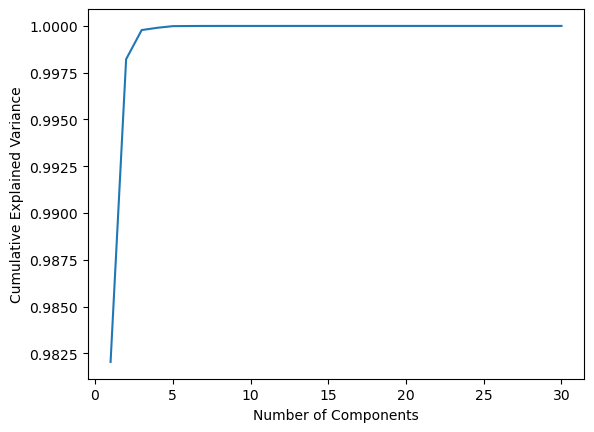

In [135]:
# 12. Use breast cancer data. Plot the cumulative explained variance as number of principal components increases.
# Use random_state = 101. Upload the figure.

X = data.iloc[:,1:] # all rows, columns 1 and onwards
y = data.iloc[:,0] # all rows, column 0

# Perform PCA with various numbers of components
pca = PCA(random_state = 101).fit(X) 
components = list(range(1, X.shape[1]+1)) # get a list of # of components
cumulative_var = np.cumsum(pca.explained_variance_ratio_) # use np.cumsum function to calculate cumulative var by # of components

# Plot the cumulative explained variance
plt.plot(components, cumulative_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

plt.savefig('cumulative_explained_variance.png')

In [136]:
# 13. Use breast cancer data. Run a PCA with 2 principal components. 
# Use random_state = 101. Calculate values of new variables based on principal components.
# What's the value of component 2 (named '1') for the first data point? Round to nearest 1 decimal.

X = data.iloc[:,1:] # all rows, columns 1 and onwards
y = data.iloc[:,0] # all rows, column 0

pca = PCA(n_components=2, random_state=101)
X_pca = pca.fit_transform(X)

# Calculate the value of component 2 for the first data point
component_2_first_data_point = X_pca[0][1]

# Round to the nearest 1 decimal
rounded_component_2 = round(component_2_first_data_point, 1)

rounded_component_2

-293.9

In [138]:

X = data.iloc[:,1:] # all rows, columns 1 and onwards
y = data.iloc[:,0] # all rows, column 0

pca = PCA(n_components=2, random_state=101)
X_pca = pca.fit_transform(X)
projected_variables = pd.DataFrame(X_pca)
data2 = pd.concat([labels, projected_variables], axis=1)
data2.head()

,diagnosis,0,1
0,0,1160.142574,-293.917544
1,0,1269.122443,15.630182
2,0,995.793889,39.156743
3,0,-407.180803,-67.380320
4,0,930.341180,189.340742


In [139]:
# 14. Use breast cancer data. Use the results from Q13 (values of 2 principal components) to run a logistic regression to predict the target variable (diagnosis). 
# Use test size of 30% and random_state = 101 to split the data.
# For the logistic regression, use solver = 'lbfgs', multi_class = 'multinomial', max_iter = 5000. 
# What's the accuracy of logistic regression on test data? Round to nearest 2 decimals. 

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [141]:
X = data.iloc[:,1:] # all rows, columns 1 and onwards
y = data.iloc[:,0] # all rows, column 0

# Perform PCA with 2 components
pca = PCA(n_components=2, random_state=101)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=101)

# Create and fit a logistic regression model
model = LogisticRegression(solver='lbfgs', multi_class= 'multinomial', max_iter=5000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the logistic regression model on the test data
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.9181286549707602

In [151]:
# 15. Use breast cancer data. Run an ICA for 1 to 30 components.
# Use max_iter = 1000, random_state = 101. Create a figure of kurtosis as the number of components increases.
# Upload the figure. 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kurtosis # to install scipy, search 'scipy anaconda'
from sklearn.decomposition import FastICA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
%matplotlib inline


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Sta

components: 1 , kurtosis: 3.844110178211147
components: 2 , kurtosis: 13.269620524359189
components: 3 , kurtosis: 51.08939483672385
components: 4 , kurtosis: 41.8857560103525
components: 5 , kurtosis: 34.585731383007065
components: 6 , kurtosis: 33.24713041617357
components: 7 , kurtosis: 30.470729535802377
components: 8 , kurtosis: 33.29571865403263
components: 9 , kurtosis: 29.835465954636884
components: 10 , kurtosis: 28.456663486928043
components: 11 , kurtosis: 27.093880427800762


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


components: 12 , kurtosis: 28.82458156621142
components: 13 , kurtosis: 28.62211414675435
components: 14 , kurtosis: 26.811717012189856


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


components: 15 , kurtosis: 29.8464636744438
components: 16 , kurtosis: 27.8864773431285
components: 17 , kurtosis: 30.60856163358745


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


components: 18 , kurtosis: 29.120689140255276
components: 19 , kurtosis: 26.937226629685018


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


components: 20 , kurtosis: 26.797922568654894
components: 21 , kurtosis: 27.076122339225805


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


components: 22 , kurtosis: 27.523238090917086


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


components: 23 , kurtosis: 31.100380154249905
components: 24 , kurtosis: 30.86917400075391


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


components: 25 , kurtosis: 30.038929254316628
components: 26 , kurtosis: 29.698433481771307
components: 27 , kurtosis: 29.69318750298656
components: 28 , kurtosis: 29.261938659677778


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


components: 29 , kurtosis: 30.414555933934142


C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


components: 30 , kurtosis: 33.96527433001647


Text(0.5, 1.0, 'Kurtosis vs. # of Independent Components')

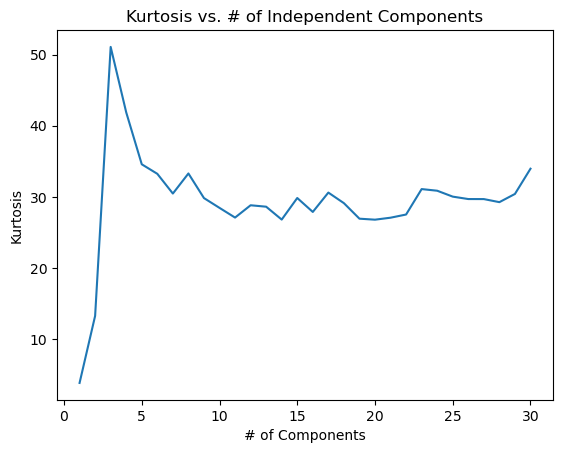

In [153]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kurtosis # to install scipy, search 'scipy anaconda'
from sklearn.decomposition import FastICA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
%matplotlib inline


# Load the breast cancer dataset
X = data.iloc[:,1:] # all rows, columns 1 and onwards
y = data.iloc[:,0] # all rows, column 0
# Define the range of components (1 to 30)
n_components_range = range(1, 31)
kurtosis = []

# Perform ICA for different numbers of components
for i in n_components_range:
    ica = FastICA(n_components= i, max_iter=1000, random_state=101)
    ica.fit(X)
    
    # transform x-vars using ind components
    projected_variables = ica.transform(X)
    projected_variables = pd.DataFrame(projected_variables)

    # calc. mean absolute value of kurtosis for the components
    k = projected_variables.kurt(axis = 0).abs().mean()
    kurtosis.append(k)
    
    # using kurtosis is good if your goal is to find # of independent components rather than making predictions
    print('components:', i, ', kurtosis:', k)
    
plt.plot(components, kurtosis)
plt.ylabel('Kurtosis')
plt.xlabel('# of Components')
plt.title('Kurtosis vs. # of Independent Components')

C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\elvin\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Sta

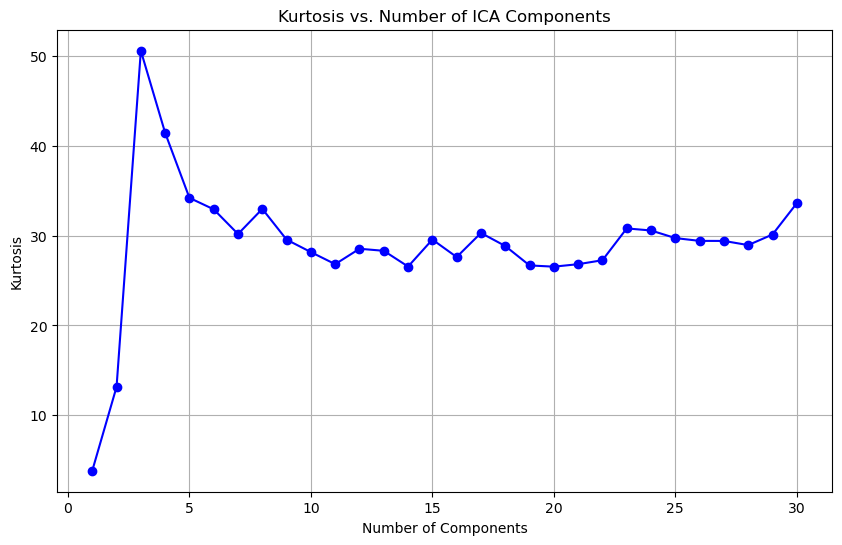

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data

# Define the range of components (1 to 30)
n_components_range = range(1, 31)
kurtosis_values = []

# Perform ICA for different numbers of components
for n_components in n_components_range:
    ica = FastICA(n_components=n_components, max_iter=1000, random_state=101)
    X_ica = ica.fit_transform(X)
    kurtosis_values.append(np.mean(kurtosis(X_ica)))

# Create a figure of kurtosis as the number of components increases
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, kurtosis_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')
plt.title('Kurtosis vs. Number of ICA Components')
plt.grid(True)

# Save the figure
plt.savefig('kurtosis_vs_components.png')

# Show the plot (optional)
plt.show()


In [88]:
# 16. Use the results from Q15. How many components resulted in the highest kurtosis? 

In [159]:
# Find the index of the maximum kurtosis value
max_kurtosis_index = kurtosis_values.index(max(kurtosis_values))

# The number of components with the highest kurtosis
components_with_highest_kurtosis = n_components_range[max_kurtosis_index]
components_with_highest_kurtosis


3